In [1]:
!pip install keras-cv==0.6.1 keras-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.2/756.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 64.6 MB/s eta 0:00:00


In [2]:
import time
import keras_cv
from tensorflow import keras
import matplotlib.pyplot as plt

Using TensorFlow backend


In [3]:
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

In [5]:
keras.mixed_precision.set_global_policy("mixed_float16")
model = keras_cv.models.StableDiffusion(jit_compile=True)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


198180272/198180272 [==============================] - 1s 0us/step


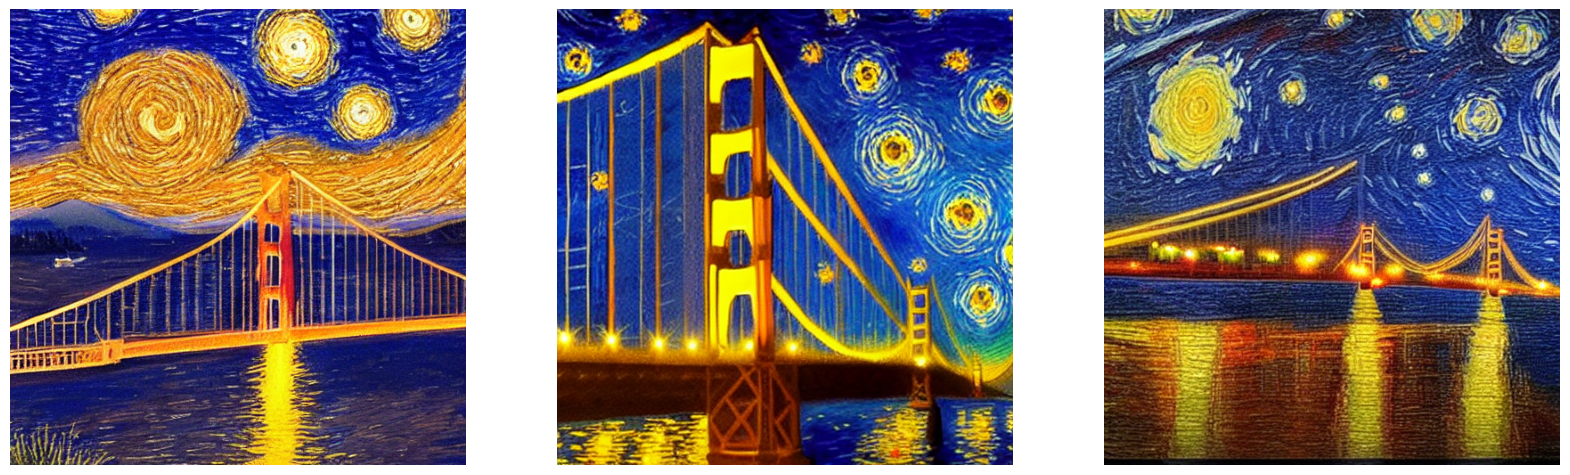

In [6]:
# Let's make sure to warm up the model
images = model.text_to_image(
    "Golden gate bridge in the style of Starry Night",
    batch_size=3,
)
plot_images(images)

50/50 [==============================] - 46s 922ms/step
XLA + mixed precision: 46.83 seconds


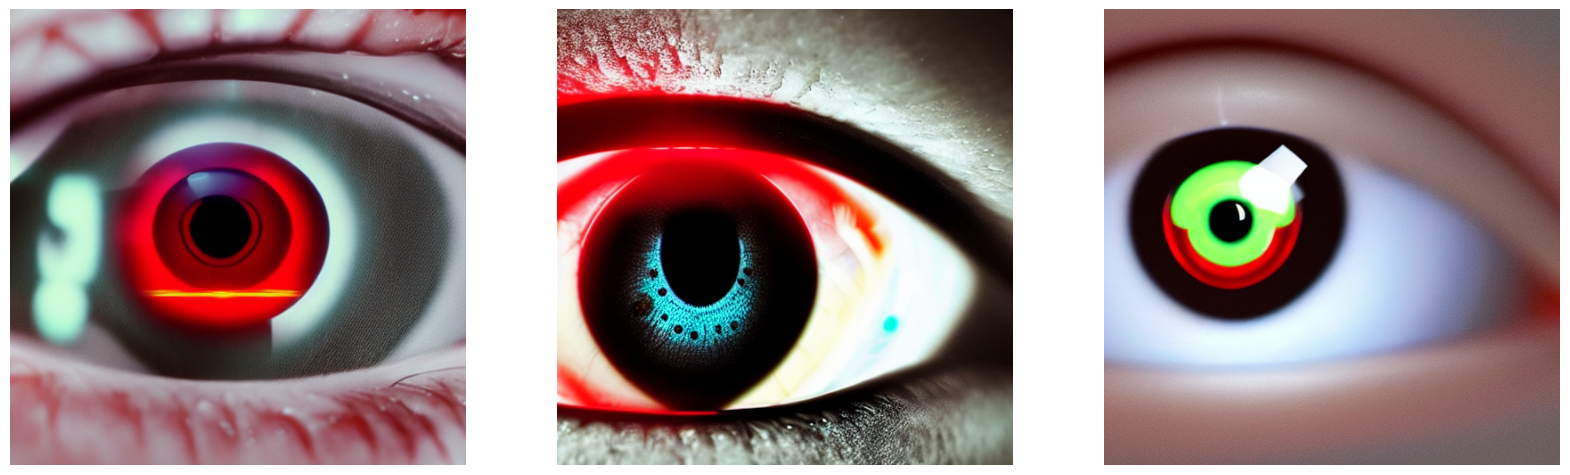

In [7]:
start = time.time()
images = model.text_to_image(
    "a close up of a person's eye with a red light, robot eye, robotic eye,"
    " cyborg eyes, eye cyberpunk bionics, robotic eyes, robot eyes, glowing "
    "white mechanical eye, cybernetic eye, glowing mechanical eye, glowing "
    "mechanical eye camera, android eyes, techno eye, human with one robot "
    "eye, cybernetic eyes implants, open robotic eyes",
    batch_size=3,
)
end = time.time()
plot_images(images)

print(f"XLA + mixed precision: {(end - start):.2f} seconds")

![](https://deeplearningcourses.com/notebooks_v3_pxl?sc=pUMo7qJJA-9KZG32o7CO7A&n=Stable+Diffusion+3+%28Mixed+Precision+%2B+JIT%29)